![](https://miro.medium.com/max/1400/1*e1h2huKYFWUsR4sGwu47gQ.png)

<div class="alert alert-block alert-info"> 
<p style="font-size:20px; display:inline">💡</p> 
construct meta Data
    
- role 
- category 
- level ==> binary|nominal|ordinal|interval|ratio
- dtype ==> int | float | object...
- unique 
- cardinality ==> high|low|median
- missing
- missing_percent 
- imputation
- keep 

</div>

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
test

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892811,1488022,0,1,6,0,0,0,1,0,0,...,4,2,3,4,0,1,0,0,1,0
892812,1488023,5,3,5,1,0,0,0,1,0,...,6,2,2,11,0,0,1,1,0,0
892813,1488024,0,1,5,0,0,1,0,0,0,...,5,2,2,11,0,1,1,0,0,0
892814,1488025,6,1,5,1,0,0,0,0,1,...,1,1,2,7,1,1,0,0,0,0


In [3]:

fullset = pd.concat([train, test])
fullset

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0.0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0.0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0.0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0.0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0.0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892811,1488022,NaN,0,1,6,0,0,0,1,0,...,4,2,3,4,0,1,0,0,1,0
892812,1488023,NaN,5,3,5,1,0,0,0,1,...,6,2,2,11,0,0,1,1,0,0
892813,1488024,NaN,0,1,5,0,0,1,0,0,...,5,2,2,11,0,1,1,0,0,0
892814,1488025,NaN,6,1,5,1,0,0,0,0,...,1,1,2,7,1,1,0,0,0,0


 


```diff
For each column, apply labels according to the provided rules. The rules are divided into two categories: category and level.

Category Rules:

If the column name contains "ind", label it as "individual".
If the column name contains "car", label it as "car".
If the column name contains "calc", label it as "calculated".
Level Rules:

Columns with "bin" in their name or columns that are the target should be classified as "binary".
Columns with "cat" in their name or columns that are IDs should be classified as "nominal".
Columns with data type "float" should be classified as "interval".
Columns with data type "int" should be classified as "ordinal".



```

In [4]:
def meta(train,test):
    fullset=pd.concat([train, test])
    data=[]
    for x in fullset.columns:
        if x == 'id':
            role= 'id'
        elif x == 'target':
            role= 'target'
        else:
            role= 'feature'

        if x.endswith('cat') or x=='id':
            level= 'nominal'
        elif x.endswith('bin')or x=='target':
            level= 'binary' 
        elif fullset[x].dtype=='float64':
            if fullset[x].max() <= 1 and fullset[x].min() >=-1 :
                level = 'ratio'       
            else:
                level= 'interval'
        elif fullset[x].dtype=='int64':
            level= 'ordinal'   
    
        if x=='id':
            keep='Flase'
        else:
            keep='True'
    
        if 'ind' in x:
            category = 'individual'
        elif 'reg' in x:
            category = 'region'
        elif 'car' in x:
            category ='car'
        elif 'calc' in x:
            category ='calculated'
        else:
            category ='other'
    
        dtype=fullset[x].dtype
     
        if x == 'id' or fullset[x].dtype == 'float64':
            cardinality = 'Ignore'
        else:
            cardinality = fullset[x].nunique()

                
        if cardinality == 'Ignore':
            cardinality_level = 'Ignore'
        elif cardinality <= 10:
            cardinality_level = 'Low Cardinality'
        elif cardinality <= 30:
            cardinality_level = 'Medium Cardinality'
        else:
            cardinality_level = 'High Cardinality'
        
        missing = sum(fullset[x] == -1)
        
        missing_percent = f'{missing}({round(missing*100/len(fullset),2)}%)'
        
        if missing > fullset.shape[0]*0.4:
            imputation = 'remove'
        elif missing > 0:
            if level == 'binary' or level == 'nominal':
                imputation = ('mode')
            if level == 'ordinal':
                imputation = ('mode','median')
            if level == 'interval' or level == 'ratio':
                imputation = ('mode','median','mean')        
        else:
            imputation = "No Missing"        
        
        
        
     
        dict={'colname':x, 'role':role,'category':category,'level':level,'dtype':dtype,'cardinality_level':cardinality_level,'cardinality': cardinality,'missing':missing, 'missing_percent':missing_percent,'imputation': imputation, 'keep':keep} 
        data.append(dict)
    meta=pd.DataFrame(data,columns=['colname','role','category','level','dtype','cardinality','cardinality_level','missing','missing_percent','imputation','keep'])
    meta.set_index('colname', inplace=True)
    return meta
    
        

In [5]:
metadata=meta(train,test)
metadata

,role,category,level,dtype,cardinality,cardinality_level,missing,missing_percent,imputation,keep
colname,,,,,,,,,,
id,id,other,nominal,int64,Ignore,Ignore,0,0(0.0%),No Missing,Flase
target,target,other,binary,float64,Ignore,Ignore,0,0(0.0%),No Missing,True
ps_ind_01,feature,individual,ordinal,int64,8,Low Cardinality,0,0(0.0%),No Missing,True
ps_ind_02_cat,feature,individual,nominal,int64,5,Low Cardinality,523,523(0.04%),mode,True
ps_ind_03,feature,individual,ordinal,int64,12,Medium Cardinality,0,0(0.0%),No Missing,True
ps_ind_04_cat,feature,individual,nominal,int64,3,Low Cardinality,228,228(0.02%),mode,True
ps_ind_05_cat,feature,individual,nominal,int64,8,Low Cardinality,14519,14519(0.98%),mode,True
ps_ind_06_bin,feature,individual,binary,int64,2,Low Cardinality,0,0(0.0%),No Missing,True
ps_ind_07_bin,feature,individual,binary,int64,2,Low Cardinality,0,0(0.0%),No Missing,True


In [6]:
pd.DataFrame({'count' : metadata.groupby(['role', 'level']).size()}).reset_index().sort_values(['count'],ascending=False)

,role,level,count
0,feature,binary,17
3,feature,ordinal,16
2,feature,nominal,14
1,feature,interval,5
4,feature,ratio,5
5,id,nominal,1
6,target,binary,1


In [7]:


stats=fullset[metadata[(metadata['level'] == 'interval')|( metadata['level'] == 'ratio') ].index].describe()
stats

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06
mean,6.110305e-01,4.395943e-01,5.514848e-01,3.799519e-01,8.134878e-01,2.763614e-01,3.067355e+00,4.496817e-01,4.501073e-01,4.499718e-01
std,2.876763e-01,4.045123e-01,7.938159e-01,5.836187e-02,2.247024e-01,3.569623e-01,7.299510e-01,2.872071e-01,2.871817e-01,2.872136e-01
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,2.506191e-01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e-01,2.000000e-01,5.250000e-01,3.162278e-01,6.710052e-01,3.339162e-01,2.828427e+00,2.000000e-01,2.000000e-01,2.000000e-01
50%,7.000000e-01,3.000000e-01,7.211103e-01,3.741657e-01,7.660406e-01,3.687818e-01,3.316625e+00,4.000000e-01,5.000000e-01,5.000000e-01
75%,9.000000e-01,6.000000e-01,1.001561e+00,4.000000e-01,9.061429e-01,3.964846e-01,3.605551e+00,7.000000e-01,7.000000e-01,7.000000e-01
max,9.000000e-01,1.800000e+00,4.423517e+00,1.264911e+00,4.031301e+00,6.363961e-01,3.741657e+00,9.000000e-01,9.000000e-01,9.000000e-01


Data imblance!

<AxesSubplot: >

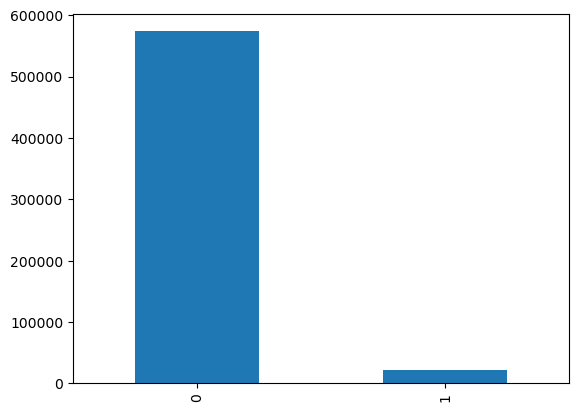

In [8]:
train.target.value_counts().plot(kind = 'bar')

In [9]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [10]:
from data_management import data_report

In [11]:
data_report(train,test,metadata,verbose=True)

Number of rows in train: 595212 | Number of rows in test: 892816
Number of columns in train: 59 | Number of columns in test: 58
Total number of elements in train: 35117508
Total number of elements in test: 51783328
--------------------------------------------------INFO--------------------------------------------------
【train info】
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10 